In [37]:
#!conda install --yes --prefix {sys.prefix} gradio
!pip install gradio

In [38]:
# Import pandas
import pandas as pd
# Import the required dependencies from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Set the column width to view the text message data.
pd.set_option('max_colwidth', 200)

# Import Gradio
import gradio as gr

In [39]:
def sms_classification(sms_text_df):
    """
    Perform SMS classification using a pipeline with TF-IDF vectorization and Linear Support Vector Classification.

    Parameters:
    - sms_text_df (pd.DataFrame): DataFrame containing 'text_message' and 'label' columns for SMS classification.

    Returns:
    - text_clf (Pipeline): Fitted pipeline model for SMS classification.

    This function takes a DataFrame with 'text_message' and 'label' columns, splits the data into
    training and testing sets, builds a pipeline with TF-IDF vectorization and Linear Support Vector
    Classification, and fits the model to the training data. 
    The fitted pipeline is returned to make future predictions.
    """
    # Set the features variable to the text message column.
    X = sms_text_df['text_message'] 
    
    # Set the target variable to the "label" column.
    y = sms_text_df['label']

    # Split data into training and testing and set the test_size = 33%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Build a pipeline to transform the test set to compare to the training set.
    text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),
    ])

    # Fit the model to the transformed training data and return model.
    text_clf.fit(X_train, y_train)
    
    return text_clf

In [40]:
# Load the dataset into a DataFrame
sms_text_df = pd.read_csv('Resources/SMSSpamCollection.csv')
sms_text_df.head()

,label,text_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [41]:
# Call the sms_classification function with the DataFrame and set the result to the "text_clf" variable
text_clf = sms_classification ( sms_text_df )

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [42]:
# Create a function called `sms_prediction` that takes in the SMS text and predicts the whether the text is "not spam" or "spam". 
# The function should return the SMS message, and say whether the text is "not spam" or "spam".
def sms_prediction(text):
    """
    Predict the spam/ham classification of a given text message using a pre-trained model.

    Parameters:
    - text (str): The text message to be classified.

    Returns:
    - str: A message indicating whether the text message is classified as spam or not.

    This function takes a text message and a pre-trained pipeline model, then predicts the
    spam/ham classification of the text. The result is a message stating whether the text is
    classified as spam or not.
    """
    # Create a variable that will hold the prediction of a new text.
    my_list = []
    my_list.append(text)
    predicted_category = text_clf.predict ( my_list )
    
    # Using a conditional if the prediction is "ham" return the message:
    # f'The text message: "{text}", is not spam.' Else, return f'The text message: "{text}", is spam.'
    
    print ( predicted_category)
    
    if predicted_category == "ham":
        return f'The text message: "{text}", is not spam.'
    else:
        return f'The text message: "{text}", is spam.'
    

In [43]:
# Create a sms_app that takes a textbox for the inputs and has a textbox for the output.  
# Povide labels for each textbox. 
sms_app = gr.Interface(
    fn=sms_prediction, 
    inputs=gr.Textbox(lines=1, label='What is the text message you want to test?'), 
    outputs=gr.Textbox(lines=5, label='Our app has determined:'), 
    allow_flagging="never"
)
    
# Launch the app.
#sms_app.launch ( share=True )
sms_app.launch ()

Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.


['ham']
['ham']
['spam']
['spam']
['ham']
['ham']
['spam']


## Test the following text messages. 

---

1. You are a lucky winner of $5000!
2. You won 2 free tickets to the Super Bowl.
3. You won 2 free tickets to the Super Bowl text us to claim your prize.
4. Thanks for registering. Text 4343 to receive free updates on medicare.

Result 1: The text message: "You are a lucky winner of $5000!", is not spam.
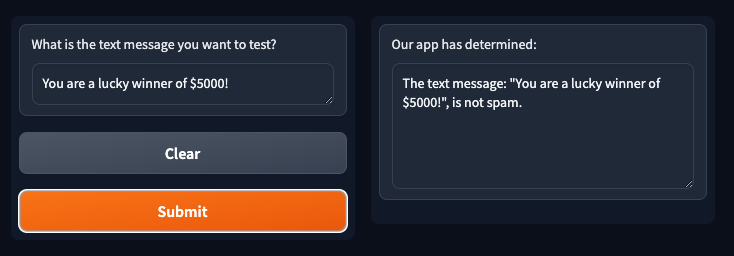
    
Result 2: The text message: "You won 2 free tickets to the Super Bowl.", is not spam.
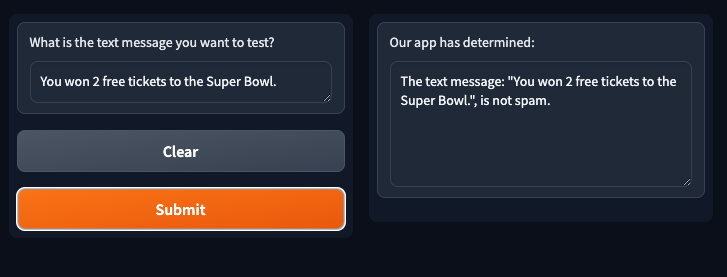

Result 3: The text message: "You won 2 free tickets to the Super Bowl text us to claim your prize.", is spam.
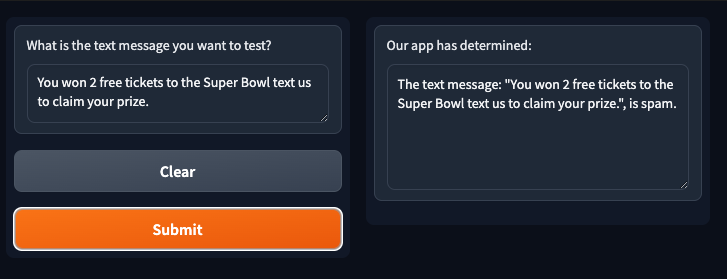

Result 4: The text message: "Thanks for registering. Text 4343 to receive free updates on medicare.", is spam.
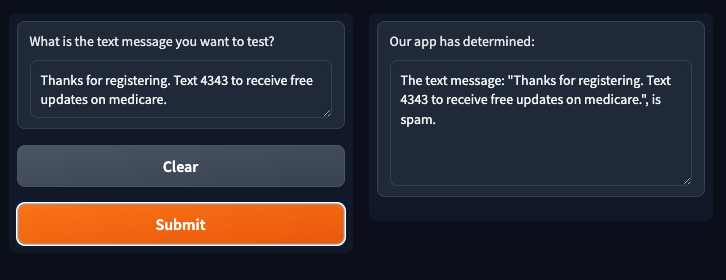